# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 612


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = (requests.get(city_url)).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | san juan del sur
Processing Record 2 of Set 1 | olinda
Processing Record 3 of Set 1 | weno
Processing Record 4 of Set 1 | acapulco de juarez
Processing Record 5 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | aykhal
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | konongo
Processing Record 11 of Set 1 | bethel
Processing Record 12 of Set 1 | ippy
Processing Record 13 of Set 1 | puerto ayora
Processing Record 14 of Set 1 | adamstown
Processing Record 15 of Set 1 | slave lake
Processing Record 16 of Set 1 | port mathurin
Processing Record 17 of Set 1 | edinburgh of the seven seas
Processing Record 18 of Set 1 | minas de marcona
Processing Record 19 of Set 1 | ilulissat
Processing Record 20 of Set 1 | tiksi
Processing Record 21 of Set 1 | boden
Processing Rec

Processing Record 37 of Set 4 | nasir
Processing Record 38 of Set 4 | wad medani
Processing Record 39 of Set 4 | crane
Processing Record 40 of Set 4 | hede
Processing Record 41 of Set 4 | khurba
Processing Record 42 of Set 4 | figuig (centre)
Processing Record 43 of Set 4 | lata
Processing Record 44 of Set 4 | dubrovytsya
Processing Record 45 of Set 4 | kotlas
Processing Record 46 of Set 4 | bandundu
Processing Record 47 of Set 4 | dakhla
Processing Record 48 of Set 4 | garissa
Processing Record 49 of Set 4 | remire-montjoly
Processing Record 0 of Set 5 | pantai cenang
City not found. Skipping...
Processing Record 1 of Set 5 | tofol
Processing Record 2 of Set 5 | porto novo
Processing Record 3 of Set 5 | talnakh
Processing Record 4 of Set 5 | wailua homesteads
Processing Record 5 of Set 5 | selfoss
Processing Record 6 of Set 5 | moyynkum
Processing Record 7 of Set 5 | mount isa
Processing Record 8 of Set 5 | mugia
Processing Record 9 of Set 5 | princeville
Processing Record 10 of Set 5

Processing Record 30 of Set 8 | randallstown
Processing Record 31 of Set 8 | paradip garh
Processing Record 32 of Set 8 | alofi
Processing Record 33 of Set 8 | solleftea
Processing Record 34 of Set 8 | kondoa
Processing Record 35 of Set 8 | xinyuan
Processing Record 36 of Set 8 | mata-utu
Processing Record 37 of Set 8 | tabou
Processing Record 38 of Set 8 | port sudan
Processing Record 39 of Set 8 | hagere maryam
Processing Record 40 of Set 8 | kerikeri
Processing Record 41 of Set 8 | katsuren-haebaru
Processing Record 42 of Set 8 | ad darb
Processing Record 43 of Set 8 | kashgar
Processing Record 44 of Set 8 | jalai nur
Processing Record 45 of Set 8 | andovoranto
Processing Record 46 of Set 8 | yaren
Processing Record 47 of Set 8 | flin flon
Processing Record 48 of Set 8 | hithadhoo
Processing Record 49 of Set 8 | labrador city
Processing Record 0 of Set 9 | hirara
Processing Record 1 of Set 9 | kolonia town
Processing Record 2 of Set 9 | lae
Processing Record 3 of Set 9 | flying fish

Processing Record 20 of Set 12 | puerto aysen
Processing Record 21 of Set 12 | xining
Processing Record 22 of Set 12 | hinton
Processing Record 23 of Set 12 | masterton
Processing Record 24 of Set 12 | ilhabela
Processing Record 25 of Set 12 | kijang
Processing Record 26 of Set 12 | rehoboth
Processing Record 27 of Set 12 | sinjai
Processing Record 28 of Set 12 | essaouira
Processing Record 29 of Set 12 | williamson
Processing Record 30 of Set 12 | carolina beach
Processing Record 31 of Set 12 | boyolangu
Processing Record 32 of Set 12 | sandakan
Processing Record 33 of Set 12 | le lavandou
Processing Record 34 of Set 12 | tanumah
Processing Record 35 of Set 12 | youhao
Processing Record 36 of Set 12 | korla
Processing Record 37 of Set 12 | port augusta
Processing Record 38 of Set 12 | portage la prairie
Processing Record 39 of Set 12 | bonthe
Processing Record 40 of Set 12 | ayod
City not found. Skipping...
Processing Record 41 of Set 12 | abatskoye
Processing Record 42 of Set 12 | va

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          582
Lat           582
Lng           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,san juan del sur,11.2529,-85.8705,32.12,70,40,3.09,NI,1695926540
1,olinda,-8.0089,-34.8553,28.85,54,0,3.60,BR,1695926540
2,weno,7.4515,151.8468,27.97,89,100,4.12,FM,1695926540
3,acapulco de juarez,16.8634,-99.8901,31.90,66,20,3.60,MX,1695926540
4,waitangi,-43.9535,-176.5597,9.34,96,100,4.47,NZ,1695926540


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,san juan del sur,11.2529,-85.8705,32.12,70,40,3.09,NI,1695926540
1,olinda,-8.0089,-34.8553,28.85,54,0,3.60,BR,1695926540
2,weno,7.4515,151.8468,27.97,89,100,4.12,FM,1695926540
3,acapulco de juarez,16.8634,-99.8901,31.90,66,20,3.60,MX,1695926540
4,waitangi,-43.9535,-176.5597,9.34,96,100,4.47,NZ,1695926540


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

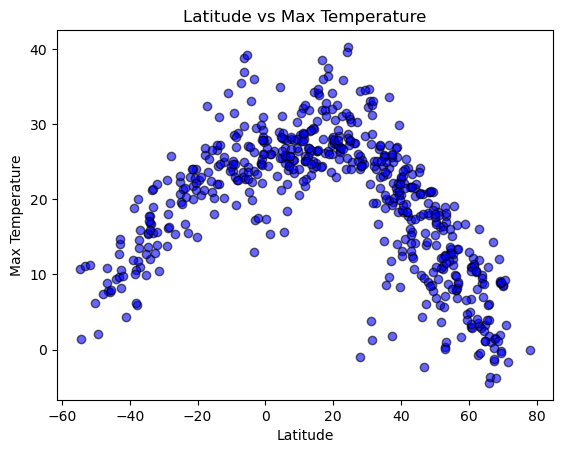

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", facecolors="b", alpha = 0.6, edgecolors="black")

# Incorporate the other graph properties
plt.title("Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

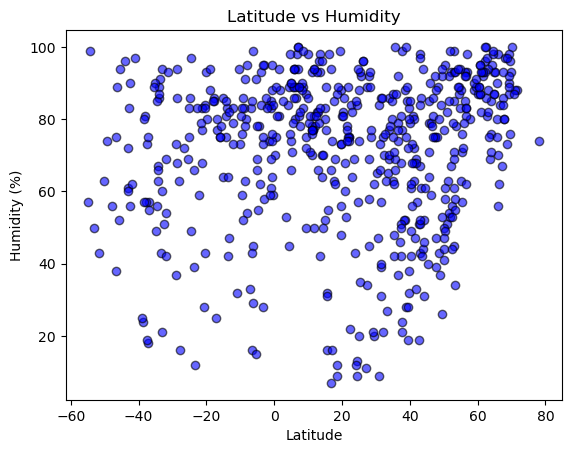

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", facecolors="b", alpha = 0.6, edgecolors="black")

# Incorporate the other graph properties
plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

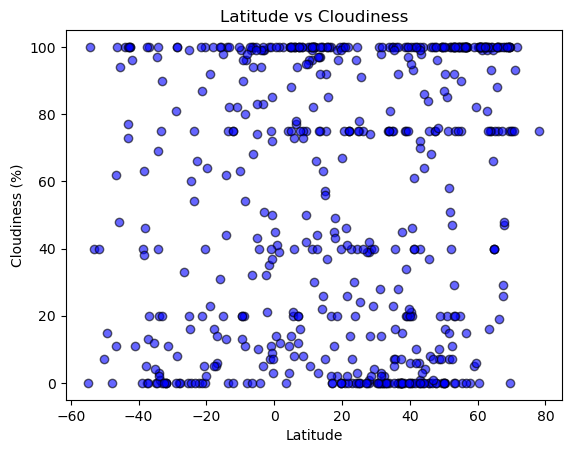

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", facecolors="b", alpha = 0.6, edgecolors="black")

# Incorporate the other graph properties
plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")


# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

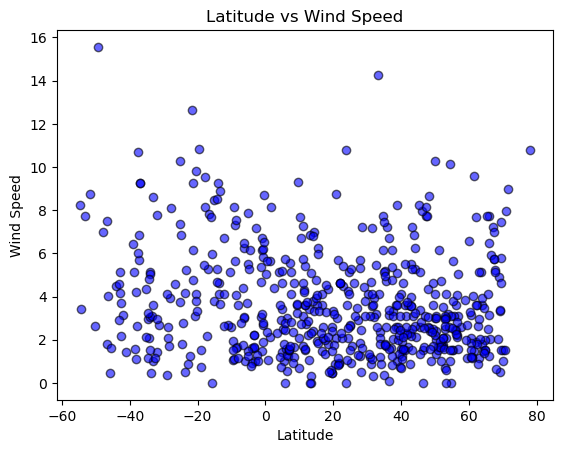

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", facecolors="b", alpha = 0.6, edgecolors="black")

# Incorporate the other graph properties
plt.title("Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linear_regress(x_values, y_values, eqn_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, eqn_coordinates, fontsize=15, color='r')
    plt.scatter(x_values,y_values)
    print(f"The r-value is: {rvalue**2}")

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,san juan del sur,11.2529,-85.8705,32.12,70,40,3.09,NI,1695926540
2,weno,7.4515,151.8468,27.97,89,100,4.12,FM,1695926540
3,acapulco de juarez,16.8634,-99.8901,31.90,66,20,3.60,MX,1695926540
5,aykhal,66.0000,111.5000,-4.42,56,75,1.26,RU,1695926540
8,konongo,6.6167,-1.2167,23.88,98,94,1.25,GH,1695926541


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] <0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,olinda,-8.0089,-34.8553,28.85,54,0,3.60,BR,1695926540
4,waitangi,-43.9535,-176.5597,9.34,96,100,4.47,NZ,1695926540
6,ushuaia,-54.8000,-68.3000,10.79,57,0,8.23,AR,1695926265
7,grytviken,-54.2811,-36.5092,1.48,99,100,3.44,GS,1695926541
11,puerto ayora,-0.7393,-90.3518,30.98,95,72,2.68,EC,1695926541


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.6278545588896004


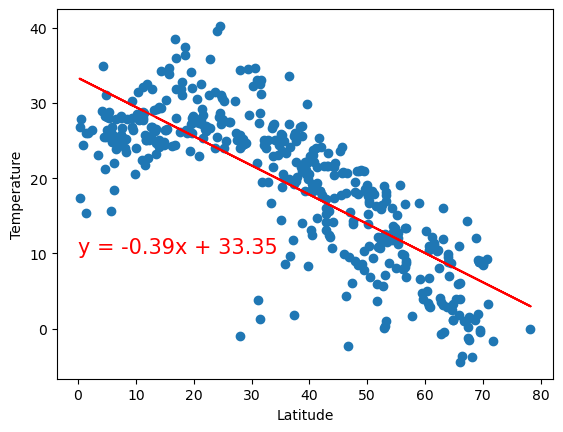

In [15]:
# Linear regression on Northern Hemisphere
plt.xlabel("Latitude")
plt.ylabel("Temperature")

linear_regress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], (0, 10))

The r-value is: 0.6671173735056761


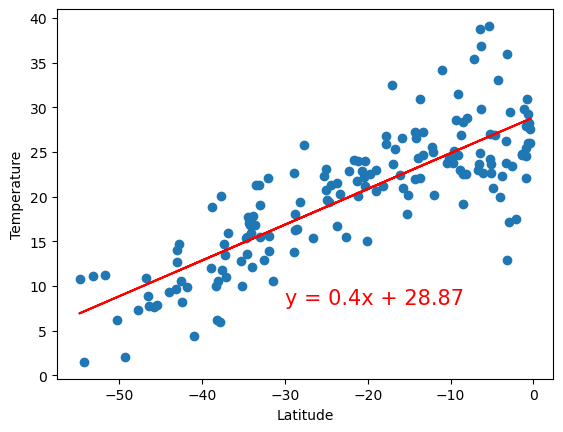

In [16]:
# Linear regression on Southern Hemisphere
plt.xlabel("Latitude")
plt.ylabel("Temperature")

linear_regress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], (-30, 8))

**Discussion about the linear relationship:** The Northern hemisphere has a moderate negative correlation whereas the Southern hemisphere has a moderate positive correlation between temperature and latitude. Meaning that in each hemisphere as you get closer to the equator, it's likely that the temperature will be higher. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.008011531948883717


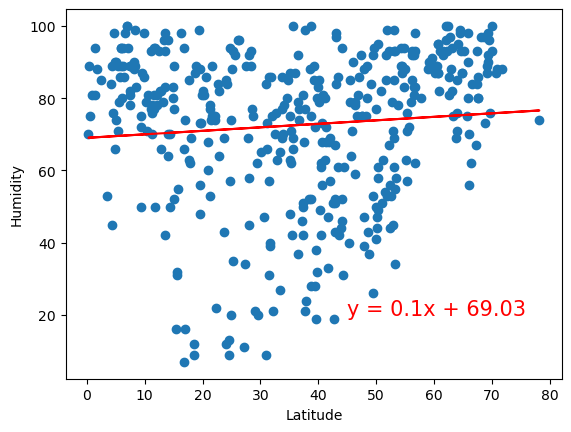

In [17]:
# Northern Hemisphere
plt.xlabel("Latitude")
plt.ylabel("Humidity")

linear_regress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], (45, 20))

The r-value is: 0.014606894871782844


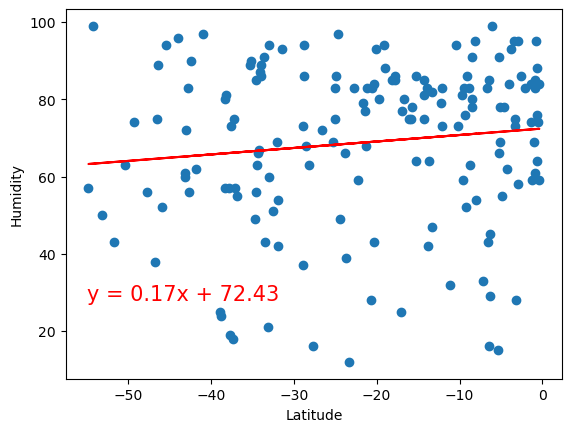

In [20]:
# Southern Hemisphere
plt.xlabel("Latitude")
plt.ylabel("Humidity")

linear_regress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], (-55, 28))

**Discussion about the linear relationship:** The Northern and Southern hemispheres have very weak positive correlations between humidity and latitude. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.01270066561057558


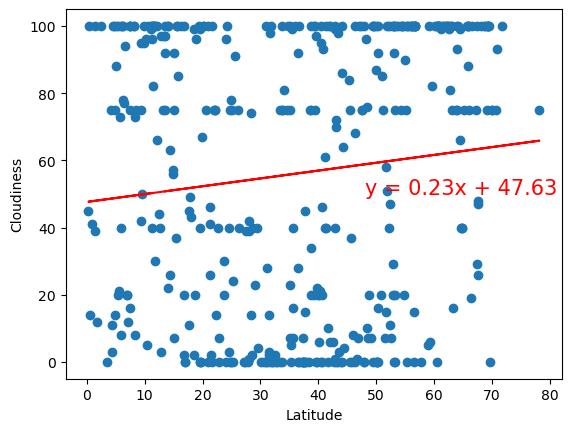

In [22]:
# Northern Hemisphere
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

linear_regress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], (48, 50))

The r-value is: 0.018195838798370043


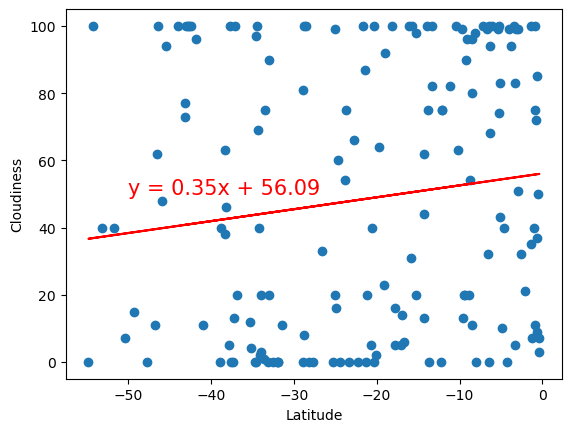

In [23]:
# Southern Hemisphere
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

linear_regress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], (-50, 50))

**Discussion about the linear relationship:** Both the Northern and Southern hemisphere have very weak positive correlations between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0026972875610867474


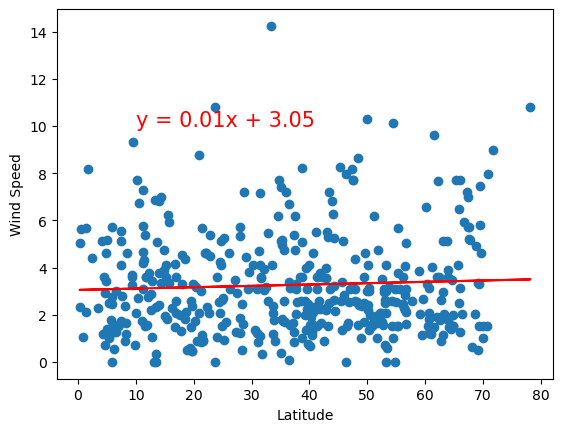

In [24]:
# Northern Hemisphere
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

linear_regress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], (10, 10))

The r-value is: 0.010919488670455776


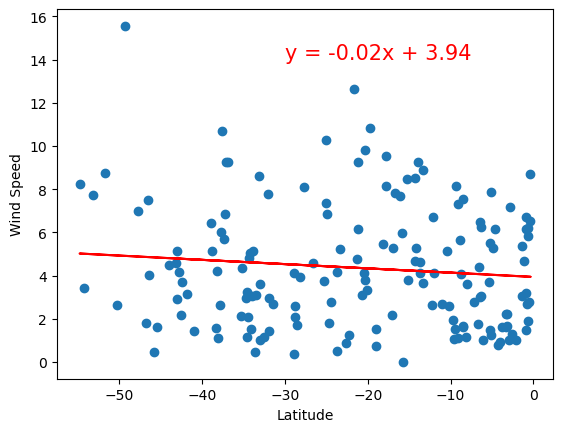

In [25]:
# Southern Hemisphere
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

linear_regress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], (-30, 14))

**Discussion about the linear relationship:** The Northern hemisphere has a near none correlation and the Southern hemisphere has a very weak negative correlation between latitude and wind speed.